<a href="https://colab.research.google.com/github/khenm/AIO_exercises/blob/feature%2Fmodule3_week1/opsd_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Data Analysis with Time Series Data**
<p align='justify'>
Time Series data is a data type where values are measured at different points of time. Each data point is computed with a frequency such as the number of visitors in a day, or the revenue in 1 month,... These values can also be unstable and uncontinuous, for example, the number of emergency calls in a day.

The following section will cover the basic operations and visuallize Time Series data by some technqiues time-based indexing, resampling, rolling. This project will use the daily time series dataset from Open Power System Data (OPSD) from Germany, which involves the total amount of electricity consumed, and produced by wind turbines and solor panels from 2006 - 2017.
</p>

In [ ]:
# download OPSD
!gdown 1gu2p_CetdIsnWLb_ffD1POp84JBnJ7TS

Downloading...
From: https://drive.google.com/uc?id=1gu2p_CetdIsnWLb_ffD1POp84JBnJ7TS
To: /content/opsd_germany_daily.csv
100% 222k/222k [00:00<00:00, 23.8MB/s]


In [ ]:
#@title Import Libraries and Read Dataset
import pandas as pd

dataset_path = './opsd_germany_daily.csv'

# Read data from .csv file
data = pd.read_csv(dataset_path)
print(data.shape)
print(data.dtypes)
data.head()

(4383, 5)
Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object


,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [ ]:
data = data.set_index('Date')
data.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


The alternative one - line solution for this would be reading the file and setting the index as the same time. This can be shown as following:

In [ ]:
data = pd.read_csv(dataset_path, index_col=0, parse_dates=True)

# Add columns with year, month and weekday name
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Weekday Name'] = data.index.day_name()
# Display a random sampling of 5 rows
data.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


In [ ]:
#@title Time-based Indexing
# Accessing value from 2014-01-20 to 2014-01-22
data.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


What if we want to know the days that are in a specific month, let's say, 2012-02? We can do it with *Partial-String indexing*.

In [ ]:
data.loc['2012-02'].head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,Wednesday
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,Thursday
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,Friday
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,Saturday
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,Sunday


<Axes: xlabel='Date'>

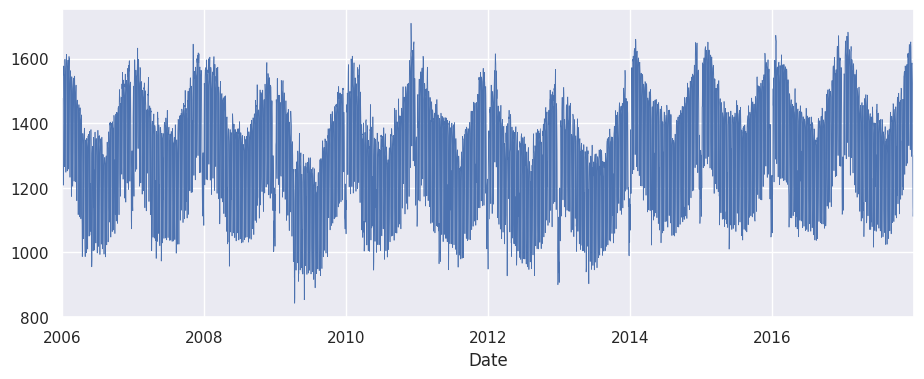

In [ ]:
#@title Visualizing time series data
import matplotlib.pyplot as plt
import seaborn as sns

# Display figures inline in Notebook
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize': (11, 4)})
data['Consumption'].plot(linewidth=0.5)

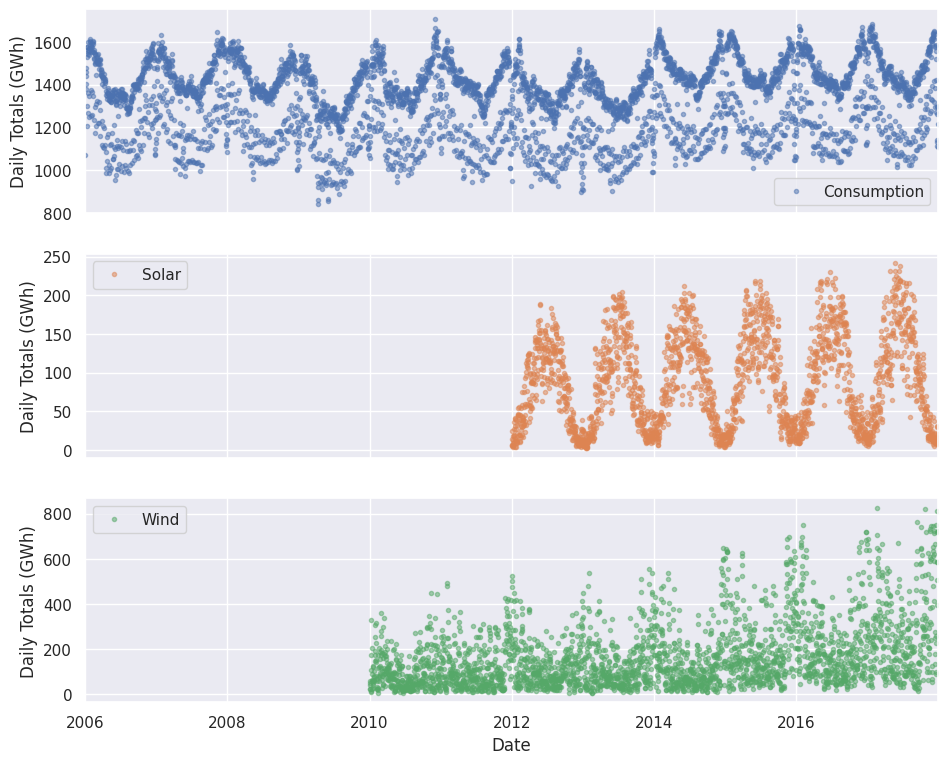

In [ ]:
# We plot multiple columns into different graphs
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None',
                            figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')
plt.show()

#### Seasonality
The repeated features in a certain period of time. These features are affected by various aspects. We can demonstrate the seasonality of each feature as below:

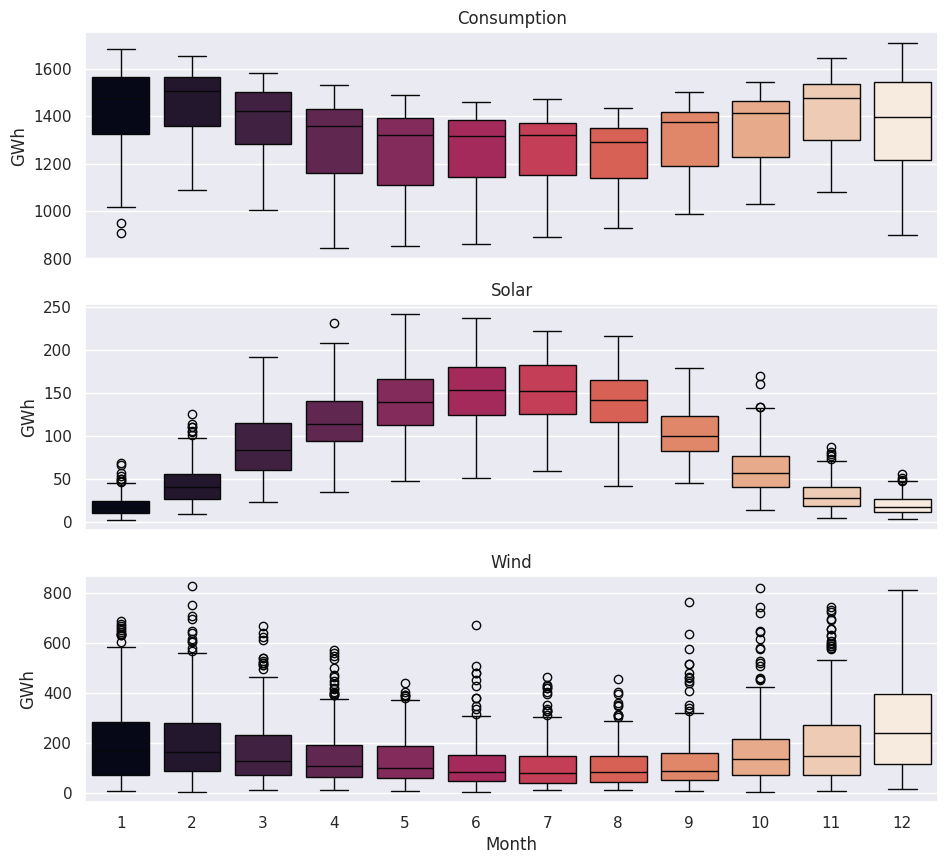

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=data, x='Month', y=name, ax=ax,
                palette='rocket', hue='Month', legend=False)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

#### Frequencies
We can use time values to craete a frequency sequence. For example, with 2 value '1999-03-10' and '1999-03-14', we can create a time list with frequencies according to date, which means the new list would be '1999-03-10', '1999-03-11', '1999-03-12', '1999-03-13', '1999-03-14'.

In [ ]:
pd.date_range('1999-03-10', '1999-03-15', freq='D')

DatetimeIndex(['1999-03-10', '1999-03-11', '1999-03-12', '1999-03-13',
               '1999-03-14', '1999-03-15'],
              dtype='datetime64[ns]', freq='D')

With this notion, we can substitute loss with *forward fill* technique. This technique aims to replace the lost value with the previous one.

In [ ]:
# To select an arbitrary sequence of date/time value sfrom a pandas time series, we need to use a DatetimeIndex, rather than simply a list of date/time strings.
times_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])
# Select the specified dates and just the Consumption column
consum_sample = data.loc[times_sample, ['Consumption']].copy()
consum_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [ ]:
# Convert the data to daily frequency, without filling any missings
consum_freq = consum_sample.asfreq('D')
# Create a column with missings forward filled
consum_freq['Consumption - Forward Fill'] = consum_sample.asfreq('D', method='ffill')
consum_freq

,Consumption,Consumption - Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


#### Resampling
This is a techinque for changing frequencies of time series data, for increasing or decreasing the sampling times. For example, switching from day sampling to month sampling.
- Resampling for lower frequency (downsampling) is used for general data, for instance, the revenue in a month from days' data.
- Resampling for higher frequency (upsampling) is less common, which is used in interpolation.  


In [ ]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday, Name)
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
# Resample to weekly frequency, aggregating with mean
weekly_mean = data[data_columns].resample('W').mean()
weekly_mean.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN
2006-02-05,1501.403286,NaN,NaN,NaN
2006-02-12,1498.217143,NaN,NaN,NaN
2006-02-19,1446.507429,NaN,NaN,NaN
2006-02-26,1447.651429,NaN,NaN,NaN


In [ ]:
print(data.shape[0])
print(weekly_mean.shape[0])

4383
627


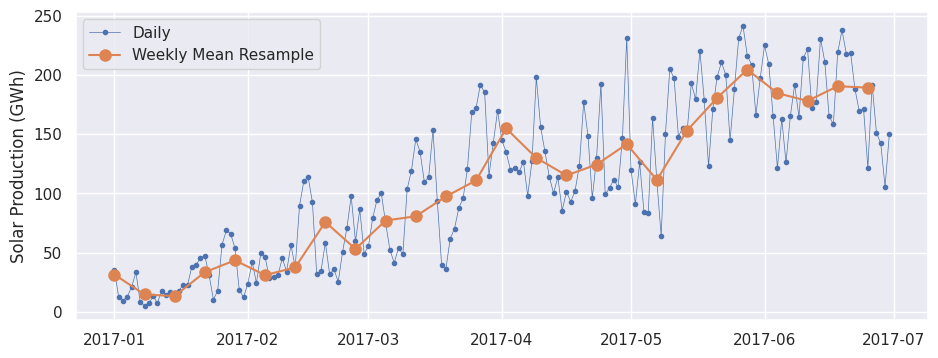

In [ ]:
# Start and End of the data range to extract
start, end = '2017-01', '2017-06'
# Plot the daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(data.loc[start:end, 'Solar'],
        marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(weekly_mean.loc[start:end, 'Solar'],
        marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend()
plt.show()

Remember our dataset has null values, therefore, we have to **min_count** to resolve this.

In [ ]:
annual = data[data_columns].resample('A').sum(min_count=360)
annual = annual.set_index(annual.index.year)
annual.index.name = 'Year'
# Compute the ratio of Wind + Solar to Consumption
annual['Wind+Solar/Consumption'] = annual['Wind+Solar'] / annual['Consumption']
annual.tail(3)

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


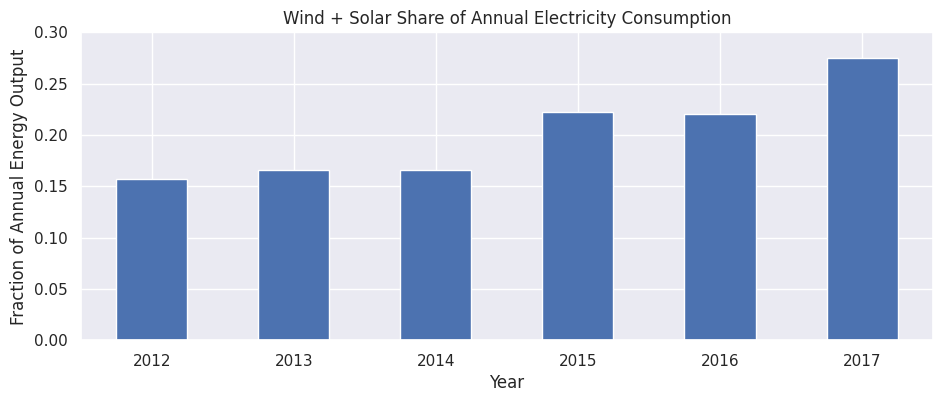

In [ ]:
# Plot from 2012 onwards, because there is no solar production data in earlier years
ax = annual.loc[2012:, 'Wind+Solar/Consumption'].plot.bar(color='C0')
ax.set_ylabel('Fraction of Annual Energy Output')
ax.set_ylim(0, 0.3)
ax.set_title('Wind + Solar Share of Annual Electricity Consumption')
plt.xticks(rotation=0)
plt.show()

#### Rolling Windows
Rolling window is also a method transfering important information in time series data. Like downsampling, rolling windows seperate data into time windows (time periods like weeks, months,... are slided on sample by date). However, the difference is that the data is not overlapping, output's frequency is lower than input's frequency.

In [ ]:
# Compute the centered 7-day rolling mean
rolling_7d = data[data_columns].rolling(7, center=True).mean()
rolling_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


#### Trends
To show the tendency of data, whether it's raising, or dropping over a long period of time.

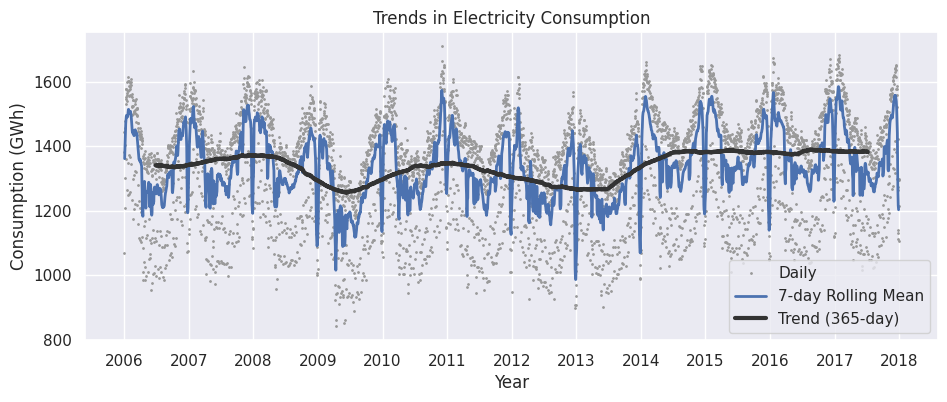

In [ ]:
import matplotlib.dates as mdates

# The min_periods=360 argument accounts for a few isolated missing days in the
# wind and solar production time series
rolling_365d = data[data_columns].rolling(window=365, center=True,
                                          min_periods=360).mean()

# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
ax.plot(data['Consumption'], marker='.', markersize=2, color='0.6',
        linestyle='None', label='Daily')
ax.plot(rolling_7d['Consumption'], linewidth=2, label='7-day Rolling Mean')
ax.plot(rolling_365d['Consumption'], color='0.2', linewidth=3, label='Trend (365-day)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')
plt.show()

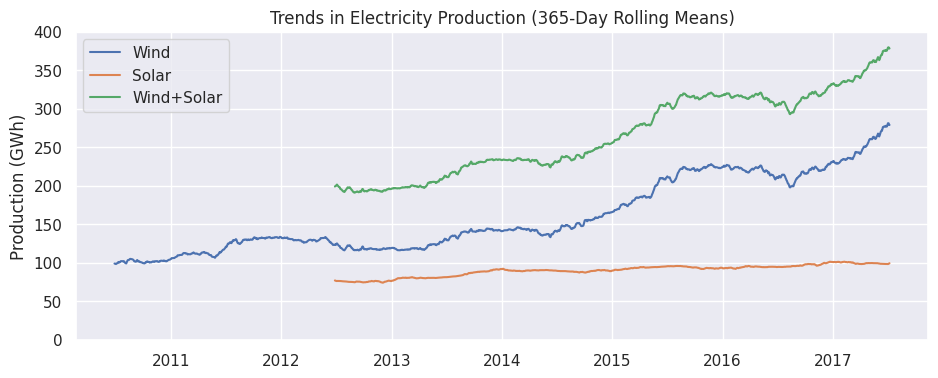

In [ ]:
# Plot 365-day rolling mean time series of wind and solar power
fig, ax = plt.subplots()
for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(rolling_365d[nm], label=nm)
    # Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0, 400)
    ax.legend()
    ax.set_ylabel('Production (GWh)')
    ax.set_title('Trends in Electricity Production (365-Day Rolling Means)')
plt.show()